In [29]:
import s3fs
import pyarrow as pa
import pyarrow.dataset as ds

import sys
import os

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import Window

import pandas as pd
import polars as pl
import altair as alt
import matplotlib.pyplot as plt

import geopandas as gpd

import datetime

from pyspark.sql.functions import *

import plotly.express as px
import pyproj
import folium

from streamlit_folium import st_folium
import streamlit as st

2024-10-21 13:46:56.670 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [4]:
spark = SparkSession.builder.remote("sc://vlenpmod302spk3.hevs.ch:15002").getOrCreate()

In [5]:
df=spark.read.parquet("hdfs://vlenpmod302spk1.hevs.ch:9000/mod302/nyc-taxi.parquet")
df.show(2)

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+------------------+-------------------+--------------------+----+-----+---+
|vendor_id|          pickup_at|         dropoff_at|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code_id|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|total_amount|improvement_surcharge|pickup_location_id|dropoff_location_id|congestion_surcharge|year|month|day|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+-----------

In [6]:
df_smol = df.filter(df.pickup_location_id.isNotNull())
df_smol.show(2)
"""df_smol=df_smol.filter((df_smol.month == 1) & (df_smol.year == 2020) & (df_smol.day == 21))
df_smol.show(2)"""

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+------------------+-------------------+--------------------+----+-----+---+
|vendor_id|          pickup_at|         dropoff_at|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code_id|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|total_amount|improvement_surcharge|pickup_location_id|dropoff_location_id|congestion_surcharge|year|month|day|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+-----------

'df_smol=df_smol.filter((df_smol.month == 1) & (df_smol.year == 2020) & (df_smol.day == 21))\ndf_smol.show(2)'

In [7]:
df_cong=df_smol.filter(df_smol.pickup_at.isNotNull()).withColumn("trip_len_sec",(unix_timestamp(df_smol.dropoff_at)-unix_timestamp(df_smol.pickup_at)))


In [76]:
df_cong.show(2)
#df_cong.printSchema()

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+------------------+-------------------+--------------------+----+-----+---+------------+
|vendor_id|          pickup_at|         dropoff_at|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code_id|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|total_amount|improvement_surcharge|pickup_location_id|dropoff_location_id|congestion_surcharge|year|month|day|trip_len_sec|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+-------

In [78]:
#df_smol.withColumn("mov_speed_mph",df_cong.trip_distance).show(2)

In [77]:
#df_cong.select("mov_speed_mph").show(2)

In [14]:
df_places = gpd.read_file('new-york-city-boroughs.geojson').drop(columns=["created_at","updated_at"])

<Axes: >

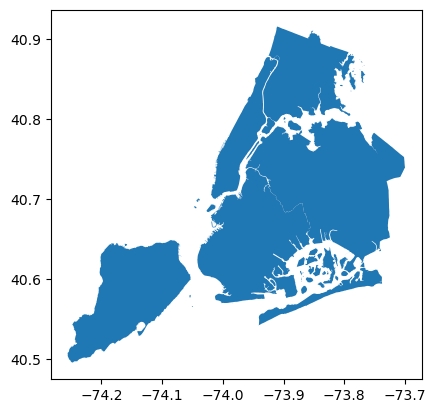

In [18]:

df_places.plot()





In [31]:
def get_pos(lat,lng):
    return lat,lng

In [53]:

m = folium.Map(location=[40.7128, -74.0060], zoom_start=14).add_child(folium.ClickForMarker("<b>Lat:</b> ${lat}<br /><b>Lon:</b> ${lng}"))
#m.save("FoliumMap.html")


map = st_folium(m, height=350, width=700)


data = None
if map.get("last_clicked"):
    data = get_pos(map["last_clicked"]["lat"], map["last_clicked"]["lng"])

if data is not None:
    st.write(data) # Writes to the app
    print(data) # Writes to terminal


2024-10-21 14:05:52.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 14:05:52.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-21 14:05:52.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
